[View in Colaboratory](https://colab.research.google.com/github/SendilCannane/Tensorflow/blob/master/Olivetti_faces.ipynb)

In [0]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from time import time
%matplotlib inline

import tensorflow as tf

In [3]:
# Load the faces dataset
#data = np.load("input/oliver")
faces_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [30]:
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print("Number of samples: {}, \nHeight of each image: {}, \nWidth of each image: {}, \nNumber of input features: {},\nNumber of output classes: {}\n"
                                               .format(n_samples,height,width,n_features,n_classes))

Number of samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096,
Number of output classes: 40



In [26]:
faces_data.data.size

1638400

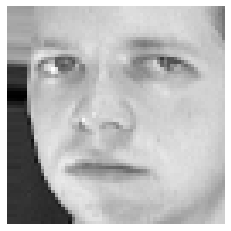

In [25]:
firstImage = faces_data.images[5]
plt.imshow(firstImage, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

X_train.shape,y_train.shape,X_test.shape,y_test.shape



((320, 4096), (320,), (80, 4096), (80,))

In [41]:
X_train

array([[0.46694216, 0.4752066 , 0.45454547, ..., 0.6694215 , 0.6735537 ,
        0.6570248 ],
       [0.25619835, 0.2231405 , 0.28099173, ..., 0.3181818 , 0.30165288,
        0.28512397],
       [0.6570248 , 0.6487603 , 0.6528926 , ..., 0.677686  , 0.59090906,
        0.6983471 ],
       ...,
       [0.55785125, 0.60330576, 0.6570248 , ..., 0.17768595, 0.20661157,
        0.19421488],
       [0.5206612 , 0.5206612 , 0.53305787, ..., 0.46694216, 0.43801653,
        0.43801653],
       [0.3966942 , 0.3677686 , 0.3429752 , ..., 0.37190083, 0.26859504,
        0.29752067]], dtype=float32)

In [42]:
y_train

array([33,  6,  5, 10, 30, 22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13,
       39, 26, 36, 25,  6, 31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2,
       36, 21, 25,  4, 23, 34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15,
       39,  6, 24, 21, 10, 31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24,
       23, 11, 33, 12, 28, 11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,
        3, 23,  9,  8,  6, 16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7,
       13, 38, 22, 21,  2, 18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37,
       22, 13, 23, 21, 27, 27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,
        9, 11, 16, 38, 38, 34,  4,  1, 28,  7, 24, 39,  7,  1, 36, 21, 38,
       38, 22, 16, 10, 16,  8, 18, 39, 11, 25, 18, 20, 37, 11, 14, 15, 15,
        1, 26,  7, 10, 32, 20, 31, 13, 23, 31, 24, 30,  1, 22, 30,  0, 27,
       12,  7, 18, 30, 37, 34, 18, 35,  8, 25,  1, 29,  8, 26,  3, 38,  5,
        4, 27,  5, 20, 31, 31, 33, 12, 22,  6, 30, 13, 18,  2,  4,  0, 20,
       33,  9, 38, 17, 25

In [0]:
y_train = y_train.reshape(320,1)
y_test = y_test.reshape(80,1)

In [48]:
y_train

array([[33],
       [ 6],
       [ 5],
       [10],
       [30],
       [22],
       [12],
       [37],
       [39],
       [32],
       [38],
       [25],
       [ 5],
       [ 0],
       [19],
       [14],
       [13],
       [39],
       [26],
       [36],
       [25],
       [ 6],
       [31],
       [15],
       [28],
       [34],
       [ 8],
       [34],
       [15],
       [29],
       [ 9],
       [ 8],
       [29],
       [ 2],
       [36],
       [21],
       [25],
       [ 4],
       [23],
       [34],
       [ 9],
       [22],
       [23],
       [23],
       [37],
       [14],
       [ 2],
       [25],
       [35],
       [16],
       [15],
       [39],
       [ 6],
       [24],
       [21],
       [10],
       [31],
       [19],
       [32],
       [ 1],
       [16],
       [18],
       [ 3],
       [11],
       [26],
       [10],
       [35],
       [24],
       [23],
       [11],
       [33],
       [12],
       [28],
       [11],
       [21],
       [13],
       [27],

In [53]:
y_train.dtype,X_test.dtype


(dtype('int64'), dtype('float32'))

In [0]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [55]:
y_train.dtype,y_test.dtype

(dtype('float32'), dtype('float32'))

In [56]:
y_train

array([[33.],
       [ 6.],
       [ 5.],
       [10.],
       [30.],
       [22.],
       [12.],
       [37.],
       [39.],
       [32.],
       [38.],
       [25.],
       [ 5.],
       [ 0.],
       [19.],
       [14.],
       [13.],
       [39.],
       [26.],
       [36.],
       [25.],
       [ 6.],
       [31.],
       [15.],
       [28.],
       [34.],
       [ 8.],
       [34.],
       [15.],
       [29.],
       [ 9.],
       [ 8.],
       [29.],
       [ 2.],
       [36.],
       [21.],
       [25.],
       [ 4.],
       [23.],
       [34.],
       [ 9.],
       [22.],
       [23.],
       [23.],
       [37.],
       [14.],
       [ 2.],
       [25.],
       [35.],
       [16.],
       [15.],
       [39.],
       [ 6.],
       [24.],
       [21.],
       [10.],
       [31.],
       [19.],
       [32.],
       [ 1.],
       [16.],
       [18.],
       [ 3.],
       [11.],
       [26.],
       [10.],
       [35.],
       [24.],
       [23.],
       [11.],
       [33.],
      

In [58]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 80)
y_test = np_utils.to_categorical(y_test, 80)

Using TensorFlow backend.


In [59]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
learning_rate = 0.01
training_epochs = 200
display_step = 30

In [0]:
x = tf.placeholder(tf.float32,[None,4096])
Y = tf.placeholder(tf.float32,[None,80])

In [0]:
w = tf.Variable(tf.zeros([4096,80]))
b = tf.Variable(tf.zeros([80]))

In [0]:
logits = tf.matmul(x,w) + b

In [0]:
y_pred = tf.nn.softmax(logits)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y)


In [0]:
cost = tf.reduce_mean(cross_entropy)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))

#with tf.name_scope('accuracy'):
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
init = tf.global_variables_initializer()

In [116]:
with tf.Session() as sess:
    sess.run(init)
    accuracy_train = []
    accuracy_test = []


    for epoch in range(training_epochs):

     idx = np.random.permutation(X_train.shape[0])
     for i in idx: 
        c,pop =  sess.run([cost,optimizer], feed_dict={x: X_train[i:i+1],Y: y_train[i:i+1]})
         
     if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
          #  accuracy_train.append(accuracy.eval({x: X_train, y: y_train}))
          #  accuracy_test.append(accuracy.eval({x: X_test, y: y_test}))
          #  s = sess.run(merged_summary, feed_dict={x: X_train, y: y_train})
           # writer.add_summary(s, epoch)

    print ("completely Optimized!")
    print ("Your model Accuracy is:", accuracy.eval({x: X_test, Y: y_test}))

Epoch: 0010 cost= 0.000867229
Epoch: 0020 cost= 0.012397371
Epoch: 0030 cost= 0.001987150
Epoch: 0040 cost= 0.005097962
Epoch: 0050 cost= 0.002165356
Epoch: 0060 cost= 0.004232853
Epoch: 0070 cost= 0.006835884
Epoch: 0080 cost= 0.024154665
Epoch: 0090 cost= 0.005661287
Epoch: 0100 cost= 0.000259008
Epoch: 0110 cost= 0.001114820
Epoch: 0120 cost= 0.002526546
Epoch: 0130 cost= 0.000412260
Epoch: 0140 cost= 0.000218725
Epoch: 0150 cost= 0.000095482
Epoch: 0160 cost= 0.001039561
Epoch: 0170 cost= 0.031308461
Epoch: 0180 cost= 0.000566441
Epoch: 0190 cost= 0.000612191
Epoch: 0200 cost= 0.000075933
completely Optimized!
Your model Accuracy is: 0.9625
